## OPTION PRICING MODEL AND STRATEGY

### The startegy that I have followed involves the use of Bollinger Bands to identify periods of low volatility and at that position I have applied Butterfly Options Trading Strategy . I have provided code for Monte Carlo Simulation etc. , they can be used to simulate the strategies in future. I have also draw some payoff diagram for dummy data just to explain

## BLACK SCHOLES MODEL

## Overview
This Python script contains functions to calculate various parameters and prices related to European call and put options using the Black-Scholes options pricing model.

## Key Functions

### calculate_d1(S, K, T, r, sigma)
- Calculate the d1 parameter used in the Black-Scholes model.
  
### calculate_d2(S, K, T, r, sigma)
- Calculate the d2 parameter used in the Black-Scholes model.

### calculate_call_price(S, K, T, r, sigma)
- Calculate the theoretical price of a European call option using the Black-Scholes formula.

### calculate_put_price(S, K, T, r, sigma)
- Calculate the theoretical price of a European put option using put-call parity.

### calculate_call_delta(S, K, T, r, sigma)
- Calculate the Delta of a European call option.

### calculate_call_gamma(S, K, T, r, sigma)
- Calculate the Gamma of a European call option.

### calculate_call_vega(S, K, T, r, sigma)
- Calculate the Vega of a European call option.

### calculate_call_theta(S, K, T, r, sigma)
- Calculate the Theta of a European call option.

### calculate_put_delta(S, K, T, r, sigma)
- Calculate the Delta of a European put option.

### calculate_put_gamma(S, K, T, r, sigma)
- Calculate the Gamma of a European put option.

### calculate_put_vega(S, K, T, r, sigma)
- Calculate the Vega of a European put option.

### calculate_put_theta(S, K, T, r, sigma)
- Calculate the Theta of a European put option.

### calculate_put_rho(S, K, T, r, sigma)
- Calculate the Rho of a European put option.


In [95]:
import numpy as np
from scipy.stats import norm
from math import log, sqrt, exp

def calculate_d1(S, K, T, r, sigma):
    """
    Calculate the d1 parameter used in the Black-Scholes options pricing model.
    
    Parameters:
    S (float): Current stock price
    K (float): Strike price of the option
    T (float): Time to expiration (in years)
    r (float): Risk-free interest rate (continuously compounded)
    sigma (float): Volatility of the stock
    
    Returns:
    float: Value of d1
    """
    numerator = log(S / K) + (r + (sigma**2) / 2) * T
    denominator = sigma * sqrt(T)
    d1 = numerator / denominator
    return d1

def calculate_d2(S, K, T, r, sigma):
    """
    Calculate the d2 parameter used in the Black-Scholes options pricing model.

    Returns:
    float: Value of d2
    """
    d1 = calculate_d1(S, K, T, r, sigma)
    d2 = d1 - sigma * sqrt(T)
    return d2

def calculate_call_price(S, K, T, r, sigma):
    """
    Calculate the theoretical price of a European call option using the Black-Scholes formula.

    Returns:
    float: Theoretical price of the call option
    """
    d1 = calculate_d1(S, K, T, r, sigma)
    d2 = calculate_d2(S, K, T, r, sigma)
    call_price = S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)
    return call_price

def calculate_put_price(S, K, T, r, sigma):
    """
    Calculate the theoretical price of a European put option using put-call parity.

    Returns:
    float: Theoretical price of the put option
    """
    call_price = calculate_call_price(S, K, T, r, sigma)
    put_price = call_price + K * exp(-r * T) - S
    return put_price

def calculate_call_delta(S, K, T, r, sigma):
    """
    Calculate the Delta of a European call option.

    Returns:
    float: Delta of the call option
    """
    d1 = calculate_d1(S, K, T, r, sigma)
    call_delta = norm.cdf(d1)
    return call_delta

def calculate_call_gamma(S, K, T, r, sigma):
    """
    Calculate the Gamma of a European call option.

    Returns:
    float: Gamma of the call option
    """
    d1 = calculate_d1(S, K, T, r, sigma)
    call_gamma = norm.pdf(d1) / (S * sigma * sqrt(T))
    return call_gamma

def calculate_call_vega(S, K, T, r, sigma):
    """
    Calculate the Vega of a European call option.

    Returns:
    float: Vega of the call option
    """
    d1 = calculate_d1(S, K, T, r, sigma)
    call_vega = 0.01 * S * norm.pdf(d1) * sqrt(T)
    return call_vega

def calculate_call_theta(S, K, T, r, sigma):
    """
    Calculate the Theta of a European call option.

    Returns:
    float: Theta of the call option
    """
    d1 = calculate_d1(S, K, T, r, sigma)
    d2 = calculate_d2(S, K, T, r, sigma)
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))

def calculate_call_rho(S, K, T, r, sigma):
    """
    Calculate the Rho of a European call option.

    Returns:
    float: Rho of the call option
    """
    d2 = calculate_d2(S, K, T, r, sigma)
    call_theta=0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
    return call_theta

def calculate_put_delta(S, K, T, r, sigma):
    """
    Calculate the Delta of a European put option.

    Returns:
    float: Delta of the put option
    """
    put_delta = calculate_call_delta(S, K, T, r, sigma) - 1
    return put_delta

def calculate_put_gamma(S, K, T, r, sigma):
    """
    Calculate the Gamma of a European put option.

    Returns:
    float: Gamma of the put option
    """
    put_gamma = calculate_call_gamma(S, K, T, r, sigma)
    return put_gamma

def calculate_put_theta(S, K, T, r, sigma):
    """
    Calculate the Theta of a European put option.

    Returns:
    float: Theta of the put option
    """
    d1 = calculate_d1(S, K, T, r, sigma)
    d2 = calculate_d2(S, K, T, r, sigma)
    first_term = (-S * norm.pdf(d1) * sigma) / (2 * sqrt(T))
    second_term = r * K * exp(-r * T) * norm.cdf(-d2)
    put_theta = 0.01 * (first_term + second_term)
    return put_theta

def calculate_put_rho(S, K, T, r, sigma):
    """
    Calculate the Rho of a European put option.

    Returns:
    float: Rho of the put option
    """
    d2 = calculate_d2(S, K, T, r, sigma)
    put_rho = 0.01 * (-K * T * exp(-r * T) * norm.cdf(-d2))
    return put_rho

def calculate_put_vega(S, K, T, r, sigma):
    """
    Calculate the Vega of a European put option.

    Returns:
    float: Vega of the put option
    """
    put_vega = calculate_call_vega(S, K, T, r, sigma)
    return put_vega

##### Testing monte carlo simulation prediction and Black Scholes Model for 1 value of data entered by user

In [82]:
## input the current stock price and check if it is a number.
S = input("What is the current stock price? ")
while True:
    try:
        S = float(S)
        break
    except:
        print("The current stock price has to be a NUMBER.")
        S = input("What is the current stock price? ")

## input the strike price and check if it is a number.
K = input("What is the strike price? ")
while True:
    try:
        K = float(K)
        break
    except:
        print("The the strike price has to be a NUMBER.")
        K = input("What is the strike price? ")


## input the expiration_date and calculate the days between today and the expiration date.
while True:
    expiration_date = input("What is the expiration date of the options? (mm-dd-yyyy) ")
    try:
        expiration_date = datetime.strptime(expiration_date, "%m-%d-%Y")
    except ValueError as e:
        print("error: %s\nTry again." % (e,))
    else:
        break
T = (expiration_date - datetime.utcnow()).days / 365


## input the continuously compounding risk-free interest rate and check if it is a number.
r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")
while True:
    try:
        r = float(r)
        break
    except:
        print("The continuously compounding risk-free interest rate has to be a NUMBER.")
        r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")
        

## input the volatility and check if it is a number.
sigma = input("What is the volatility in percentage(%)? ") 
while True:
    try:
        sigma = float(sigma)
        if sigma > 100 or sigma < 0:
            print ( "The range of sigma has to be in [0,100].")
            sigma = input("What is the volatility in percentage(%)? ")
        break
    except:
        print("The volatility has to be a NUMBER.")
        sigma = input("What is the volatility in percentage(%)? ")

error: time data '21-05-2021' does not match format '%m-%d-%Y'
Try again.
error: time data '21-05-2021' does not match format '%m-%d-%Y'
Try again.
error: time data '' does not match format '%m-%d-%Y'
Try again.
error: time data '21-05-2023' does not match format '%m-%d-%Y'
Try again.


In [96]:
data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,1.000000e+02
Strike price,K,1.000000e+02
Time to maturity,T,1.000000e+00
Risk-free interest rate,r,5.000000e-12
Volatility,sigma,2.000000e-11


In [99]:
from sklearn.metrics import mean_squared_error
true_call=price_and_greeks['Call'][0]
pred_call=model.call_option_simulation()

true_put=price_and_greeks['Put'][0]
pred_put=model.put_option_simulation()

Call_error=sqrt((pred_call-true_call)**2)
Put_error=sqrt((pred_put-true_put)**2)
print(Call_error)
print(Put_error)

Current exposure: 2.1428024391427742
Call option premium: 0.6004099554751585
Current exposure: 2.500953516981874
Put option premium: 0.3581510778390998
0.6004099554750448
0.35815107783904293


## BUTTERFLY SPREAD OPTION STRATEGY

### Some diagrams to illustrate butterfly strategy

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def call_payoff (sT, strike_price, premium):
  return np.where(sT> strike_price, sT-strike_price, 0)-premium
# Spot Price
s0 = 40
# Long Call
higher_strike_price_long_call = 35
lower_strike_price_long_call=30
premium_higher_strike_long_call = 0.85
premium_lower_strike_long_call = 3.15
# Short Call
strike_price_short_call = 32.5
premium_short_call = 1.80
# Range of call option at expiration
sT = np.arange(10,60,1)


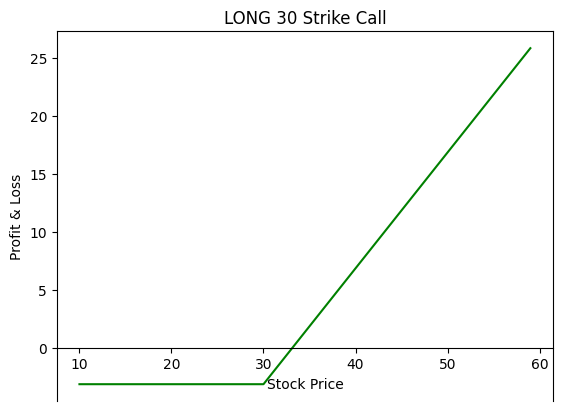

In [11]:
# OTM Strike Long Call Payoff
lower_strike_long_call_payoff = call_payoff(sT, lower_strike_price_long_call, premium_lower_strike_long_call)
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,lower_strike_long_call_payoff, color='g')
ax.set_title('LONG 30 Strike Call')
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

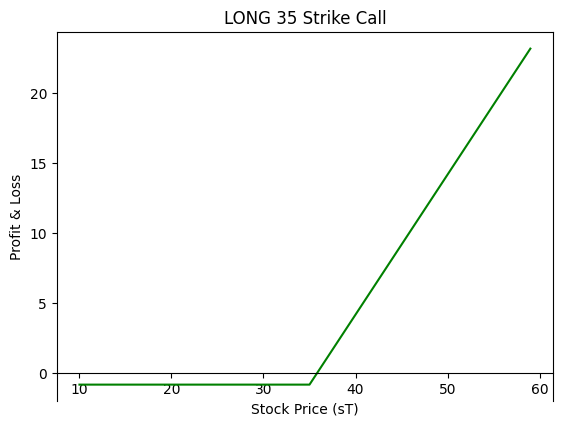

In [12]:
# Higher Strike Long Call Payoff
higher_strike_long_call_payoff = call_payoff(sT, higher_strike_price_long_call, premium_higher_strike_long_call)
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,higher_strike_long_call_payoff, color='g')
ax.set_title('LONG 35 Strike Call')
plt.xlabel('Stock Price (sT)')
plt.ylabel('Profit & Loss')
plt.show()

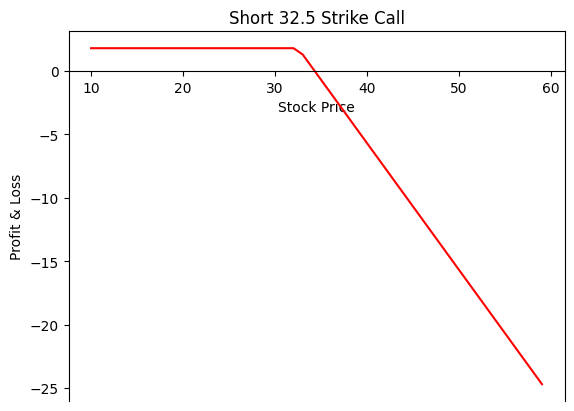

In [13]:
# Short Call Payoff
Short_call_payoff = call_payoff(sT, strike_price_short_call, premium_short_call)*-1.0
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, Short_call_payoff, color='r')
ax.set_title('Short 32.5 Strike Call')
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

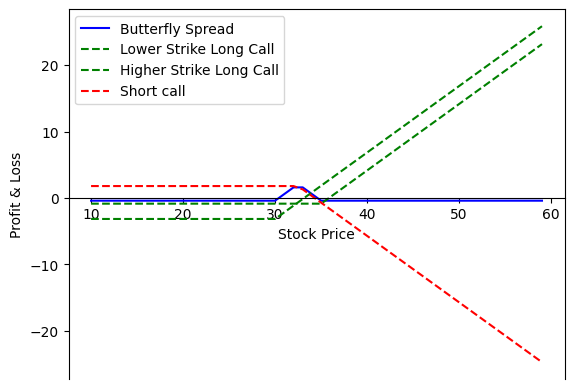

In [14]:
Butterfly_spread_payoff = lower_strike_long_call_payoff + higher_strike_long_call_payoff + 2 *Short_call_payoff
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,Butterfly_spread_payoff ,color='b', label= 'Butterfly Spread')
ax.plot(sT, lower_strike_long_call_payoff,'--', color='g',label='Lower Strike Long Call')
ax.plot(sT, higher_strike_long_call_payoff,'--', color='g', label='Higher Strike Long Call')
ax.plot(sT, Short_call_payoff, '--', color='r', label='Short call')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

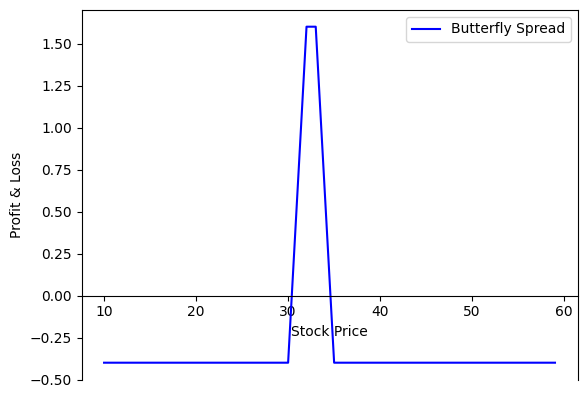

In [15]:

Butterfly_spread_payoff = lower_strike_long_call_payoff + higher_strike_long_call_payoff + 2 *Short_call_payoff
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,Butterfly_spread_payoff ,color='b', label= 'Butterfly Spread')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

In [16]:
profit = max(Butterfly_spread_payoff)
loss = min(Butterfly_spread_payoff)
print ("%.2f" %profit)
print ("%.2f" %loss)

1.60
-0.40


[*********************100%%**********************]  1 of 1 completed

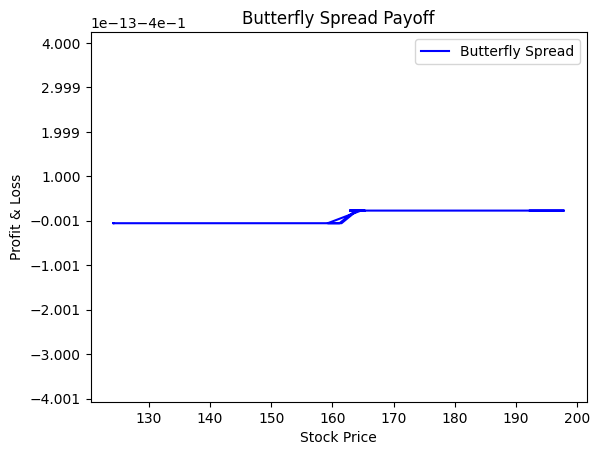

Maximum Profit: $-0.40
Maximum Loss: $-0.40


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Function to fetch stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Function to calculate the payoff for a call option
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

# Function to calculate the payoff for a butterfly spread strategy
def butterfly_spread_payoff(sT, lower_strike, higher_strike, short_strike, premiums):
    lower_strike_payoff = call_payoff(sT, lower_strike, premiums[0])
    higher_strike_payoff = call_payoff(sT, higher_strike, premiums[1])
    short_call_payoff = -1 * call_payoff(sT, short_strike, premiums[2])

    butterfly_payoff = lower_strike_payoff + higher_strike_payoff + 2 * short_call_payoff
    return butterfly_payoff

# Define inputs for the option strategy
symbol = 'SBIN.NS'  # Example stock symbol
start_date = '2023-01-01'
end_date = '2023-12-31'
s0 = 40
lower_strike_price_long_call = 30
higher_strike_price_long_call = 35
strike_price_short_call = 32.5
premium_lower_strike_long_call = 3.15
premium_higher_strike_long_call = 0.85
premium_short_call = 1.80

# Fetch stock data
stock_data = fetch_stock_data(symbol, start_date, end_date)
sT = stock_data['Adj Close'].values  # Using adjusted closing prices for stock price at expiration

# Calculate butterfly spread payoff
butterfly_payoff = butterfly_spread_payoff(sT, lower_strike_price_long_call, higher_strike_price_long_call,
                                           strike_price_short_call, [premium_lower_strike_long_call, premium_higher_strike_long_call, premium_short_call])

# Plot butterfly spread payoff
fig, ax = plt.subplots()
ax.plot(sT, butterfly_payoff, color='b', label='Butterfly Spread')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.title('Butterfly Spread Payoff')
plt.show()

# Calculate and print profit and loss
profit = max(butterfly_payoff)
loss = min(butterfly_payoff)
print(f"Maximum Profit: ${profit:.2f}")
print(f"Maximum Loss: ${loss:.2f}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the payoff for a call option
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

# Function to calculate the payoff for a butterfly spread strategy
def butterfly_spread_payoff(sT, lower_strike, higher_strike, short_strike, premiums):
    lower_strike_payoff = call_payoff(sT, lower_strike, premiums[0])
    higher_strike_payoff = call_payoff(sT, higher_strike, premiums[1])
    short_call_payoff = -1 * call_payoff(sT, short_strike, premiums[2])

    butterfly_payoff = lower_strike_payoff + higher_strike_payoff + 2 * short_call_payoff
    return butterfly_payoff

# Read the dataset
data = pd.read_csv('your_dataset.csv')

# Example data points from your dataset to use in the strategy
# Assuming you want to pick specific options for the strategy:
lower_strike_price_long_call = data.loc[0, 'Strike']
higher_strike_price_long_call = data.loc[1, 'Strike']
strike_price_short_call = data.loc[2, 'Strike']

premium_lower_strike_long_call = data.loc[0, 'Close']
premium_higher_strike_long_call = data.loc[1, 'Close']
premium_short_call = data.loc[2, 'Close']

# Stock price series (for simplicity, using the 'Close' prices as a proxy for underlying stock prices)
sT = data['Close'].values

# Calculate butterfly spread payoff
butterfly_payoff = butterfly_spread_payoff(sT, lower_strike_price_long_call, higher_strike_price_long_call,
                                           strike_price_short_call, [premium_lower_strike_long_call, premium_higher_strike_long_call, premium_short_call])

# Plot butterfly spread payoff
fig, ax = plt.subplots()
ax.plot(sT, butterfly_payoff, color='b', label='Butterfly Spread')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.title('Butterfly Spread Payoff')
plt.show()

# Calculate and print profit and loss
profit = max(butterfly_payoff)
loss = min(butterfly_payoff)
print(f"Maximum Profit: ${profit:.2f}")
print(f"Maximum Loss: ${loss:.2f}")


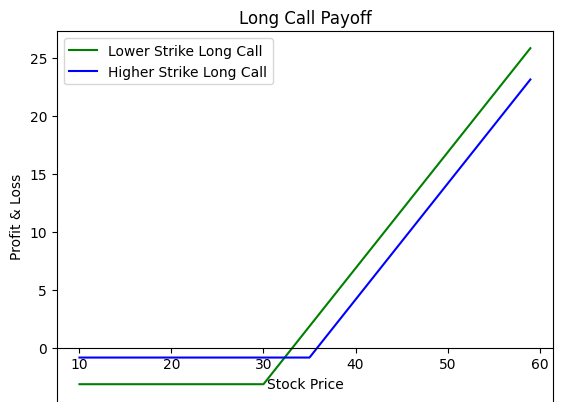

In [60]:
import yfinance as yf

# Fetch the latest stock data
ticker = "SBIN.NS"  # Replace with the desired ticker symbol
stock_data = yf.Ticker(ticker)
latest_data = stock_data.history(period="1d").iloc[-1]

# Get the current stock price
S = latest_data["Close"]

# Get the strike price (you may need to fetch option data or provide a fixed value)
K = 500  # Replace with the desired strike price

expiration_date = "2023-06-16"  # Replace with the desired expiration date (YYYY-MM-DD)
expiration_datetime = datetime.strptime(expiration_date, "%Y-%m-%d")
today = datetime.now()
T = (expiration_datetime - today).days / 365

# Get the risk-free interest rate (you may need to fetch this data or provide a fixed value)
r = 0.05  # Replace with the desired risk-free interest rate (e.g., 0.05 for 5%)

# Get the volatility (you may need to fetch this data or provide a fixed value)
sigma = 0.2  # Replace with the desired volatility (e.g., 0.2 for 20%)


def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

# Input parameters
s0 = 40
higher_strike_price_long_call = 35
lower_strike_price_long_call = 30
premium_higher_strike_long_call = 0.85
premium_lower_strike_long_call = 3.15
strike_price_short_call = 32.5
premium_short_call = 1.80

# Range of call option at expiration
sT = np.arange(10, 60, 1)

# Calculate payoffs for individual options
lower_strike_long_call_payoff = call_payoff(sT, lower_strike_price_long_call, premium_lower_strike_long_call)
higher_strike_long_call_payoff = call_payoff(sT, higher_strike_price_long_call, premium_higher_strike_long_call)

# plotting the payoffs
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, lower_strike_long_call_payoff, color='g', label='Lower Strike Long Call')
ax.plot(sT, higher_strike_long_call_payoff, color='b', label='Higher Strike Long Call')

plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.title('Long Call Payoff')
plt.legend()
plt.show()

## Backtesting

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('BANKNIFTY_FNO_Data_2017/BANKNIFTY_2017_OPTIONS.csv')

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the payoff for a call option
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

# Function to calculate the payoff for a butterfly spread strategy
def butterfly_spread_payoff(sT, lower_strike, higher_strike, short_strike, premiums):
    lower_strike_payoff = call_payoff(sT, lower_strike, premiums[0])
    higher_strike_payoff = call_payoff(sT, higher_strike, premiums[1])
    short_call_payoff = -1 * call_payoff(sT, short_strike, premiums[2])

    butterfly_payoff = lower_strike_payoff + higher_strike_payoff + 2 * short_call_payoff
    return butterfly_payoff

# Read the dataset
data = df

# Convert date columns to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Expiry'] = pd.to_datetime(data['Expiry'])

# Calculate Bollinger Bands
window = 20  # Define the rolling window size
data['Rolling Mean'] = data['Close'].rolling(window).mean()
data['Rolling Std'] = data['Close'].rolling(window).std()
data['Upper Band'] = data['Rolling Mean'] + 2 * data['Rolling Std']
data['Lower Band'] = data['Rolling Mean'] - 2 * data['Rolling Std']

# Identify low volatility periods
data['Low Volatility'] = (data['Close'] > data['Lower Band']) & (data['Close'] < data['Upper Band'])

results = []

# Loop through each expiration date to backtest the strategy
expiration_dates = data['Expiry'].unique()

for expiry in expiration_dates:
    # Filter data for the current expiry
    expiry_data = data[data['Expiry'] == expiry]
    
    if len(expiry_data) < 3:
        # Skip if there are not enough options to form a butterfly spread
        continue

    # Check for low volatility periods within the expiry date range
    low_volatility_data = expiry_data[expiry_data['Low Volatility']]
    
    if low_volatility_data.empty:
        # Skip if there are no low volatility periods
        continue

    # Choose specific options for the strategy (this can be adjusted as needed)
    lower_strike_option = expiry_data.iloc[0]
    higher_strike_option = expiry_data.iloc[1]
    short_call_option = expiry_data.iloc[2]

    lower_strike_price_long_call = lower_strike_option['Strike']
    higher_strike_price_long_call = higher_strike_option['Strike']
    strike_price_short_call = short_call_option['Strike']

    premium_lower_strike_long_call = lower_strike_option['Close']
    premium_higher_strike_long_call = higher_strike_option['Close']
    premium_short_call = short_call_option['Close']

    # Stock price at expiration
    sT = expiry_data['Close'].values

    # Calculate butterfly spread payoff
    butterfly_payoff = butterfly_spread_payoff(sT, lower_strike_price_long_call, higher_strike_price_long_call,
                                               strike_price_short_call, [premium_lower_strike_long_call, premium_higher_strike_long_call, premium_short_call])
    if max(butterfly_payoff)>500:
        break
    if min(butterfly_payoff)<-1000: 
        break
    # Store the results
    results.append({
        'Expiry': expiry,
        'Max Profit': max(butterfly_payoff),
        'Max Loss': min(butterfly_payoff),
        'Final Payoff': butterfly_payoff[-1]  # Payoff at the last stock price point
    })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Calculate and print overall profit and loss statistics
total_profit = results_df['Final Payoff'].sum()
average_profit = results_df['Final Payoff'].mean()
max_profit = results_df['Max Profit'].max()
max_loss = results_df['Max Loss'].min()

print(f"Total Profit: ${total_profit:.2f}")
print(f"Average Profit per Trade: ${average_profit:.2f}")
print(f"Maximum Profit: ${max_profit:.2f}")
print(f"Maximum Loss: ${max_loss:.2f}")


Total Profit: $-121.30
Average Profit per Trade: $-40.43
Maximum Profit: $-4.00
Maximum Loss: $-98.30


## Risk Management

In [78]:
class RiskManagement:
    def __init__(self, initial_capital, max_loss_pct, max_exposure_pct):
        self.initial_capital = initial_capital
        self.max_loss_pct = max_loss_pct
        self.max_exposure_pct = max_exposure_pct
        self.current_capital = initial_capital
        self.current_exposure = 0

    def check_capital_exposure(self, option_premium):
        # Check if the option premium exceeds the maximum exposure limit
        if option_premium > self.initial_capital * self.max_exposure_pct:
            print(f"Warning: Option premium {option_premium} exceeds the maximum exposure limit of {self.initial_capital * self.max_exposure_pct}")
            return False
        return True

    def check_capital_loss(self, potential_loss):
        # Check if the potential loss exceeds the maximum loss limit
        if potential_loss > self.initial_capital * self.max_loss_pct:
            print(f"Warning: Potential loss {potential_loss} exceeds the maximum loss limit of {self.initial_capital * self.max_loss_pct}")
            return False
        return True

    def update_capital(self, pnl):
        self.current_capital += pnl
        print(f"Current capital: {self.current_capital}")

    def update_exposure(self, option_premium):
        self.current_exposure += option_premium
        print(f"Current exposure: {self.current_exposure}")


# Overview
This Python script performs Monte Carlo simulations to price call and put options based on the Black-Scholes model. It utilizes a Risk Management module to control exposure and potential loss during trading.

# Key Components

## OptionPricing Class
- This class handles the option pricing simulations.
- It inherits from a RiskManagement class to manage trading risk.

## Attributes
- `S0`: Initial stock price.
- `E`: Strike price of the option.
- `T`: Time to maturity (in years).
- `rf`: Risk-free rate.
- `sigma`: Volatility of the stock.
- `iterations`: Number of iterations for the Monte Carlo simulation.
- `initial_capital`: Initial capital available for trading.
- `max_loss_pct`: Maximum allowable loss percentage.
- `max_exposure_pct`: Maximum allowable exposure percentage.

## Methods
- `call_option_simulation()`: Simulates a call option using Monte Carlo simulation.
- `put_option_simulation()`: Simulates a put option using Monte Carlo simulation.
- `calculate_metrics(portfolio_value)`: Calculates Sharpe Ratio and Maximum Drawdown based on portfolio value.


In [80]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

class OptionPricing(RiskManagement):
    def __init__(self, S0, E, T, rf, sigma, iterations, initial_capital, max_loss_pct, max_exposure_pct):
        """
        Initialize the OptionPricing class.

        Parameters:
        S0 (float): Current stock price.
        E (float): Strike price of the option.
        T (float): Time to maturity (in years).
        rf (float): Risk-free rate.
        sigma (float): Volatility of the stock.
        iterations (int): Number of iterations for Monte Carlo simulation.
        initial_capital (float): Initial capital for trading.
        max_loss_pct (float): Maximum allowable loss percentage.
        max_exposure_pct (float): Maximum allowable exposure percentage.
        """
        super().__init__(initial_capital, max_loss_pct, max_exposure_pct)
        self.S0 = S0
        self.E = E
        self.T = T
        self.rf = rf
        self.sigma = sigma
        self.iterations = iterations

    def call_option_simulation(self):
        """
        Perform Monte Carlo simulation for a call option.

        Returns:
        float: Premium of the call option.
        """
        # Generate random numbers for stock price simulation
        rand = np.random.normal(0, 1, [1, self.iterations])
        stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma ** 2) +
                                       self.sigma * np.sqrt(self.T) * rand)

        # Calculate option payoff and premium
        option_data = stock_price - self.E
        average = np.sum(np.amax(option_data, axis=1)) / float(self.iterations)
        call_option_premium = np.exp(-1.0 * self.rf * self.T) * average

        # Check exposure and potential loss
        if self.check_capital_exposure(call_option_premium):
            self.update_exposure(call_option_premium)
        else:
            print("Call option trade rejected due to excessive exposure.")
            return None

        potential_loss = call_option_premium
        if self.check_capital_loss(potential_loss):
            print(f"Call option premium: {call_option_premium}")
            return call_option_premium
        else:
            print("Call option trade rejected due to excessive potential loss.")
            return None

    def put_option_simulation(self):
        """
        Perform Monte Carlo simulation for a put option.

        Returns:
        float: Premium of the put option.
        """
        # Generate random numbers for stock price simulation
        rand = np.random.normal(0, 1, [1, self.iterations])
        stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma ** 2) +
                                       self.sigma * np.sqrt(self.T) * rand)

        # Calculate option payoff and premium
        option_data = self.E - stock_price
        average = np.sum(np.amax(option_data, axis=1)) / float(self.iterations)
        put_option_premium = np.exp(-1.0 * self.rf * self.T) * average

        # Check exposure and potential loss
        if self.check_capital_exposure(put_option_premium):
            self.update_exposure(put_option_premium)
        else:
            print("Put option trade rejected due to excessive exposure.")
            return None

        potential_loss = put_option_premium
        if self.check_capital_loss(potential_loss):
            print(f"Put option premium: {put_option_premium}")
            return put_option_premium
        else:
            print("Put option trade rejected due to excessive potential loss.")
            return None


if __name__ == '__main__':
    # Define option parameters
    S0 = 100
    E = 100
    T = 1
    rf = 0.05
    sigma = 0.2
    iterations = 100
    initial_capital = 100000
    max_loss_pct = 0.1  # 10% maximum loss
    max_exposure_pct = 0.5  # 50% maximum exposure

    # Create an instance of OptionPricing class and perform call option simulation
    model = OptionPricing(S0, E, T, rf, sigma, iterations,
                          initial_capital, max_loss_pct, max_exposure_pct)
    call_option_premium = model.call_option_simulation()


Current exposure: 0.6512597302941787
Call option premium: 0.6512597302941787


## Thank You